In [4]:
from gensim.models import Word2Vec
import pandas as pd

# بيانات سورة الفاتحة
sentences = [
    ['بسم', 'الله', 'الرحمن', 'الرحيم'],
    ['الحمد', 'لله', 'رب', 'العالمين'],
    ['الرحمن', 'الرحيم'],
    ['مالك', 'يوم', 'الدين'],
    ['اياك', 'نعبد', 'واياك', 'نستعين'],
    ['اهدنا', 'الصراط', 'المستقيم'],
    ['صراط', 'الذين', 'انعمت', 'عليهم', 'غير', 'المغضوب', 'عليهم', 'ولا', 'الضالين']
]

# تدريب النموذج
model = Word2Vec(
    sentences,
    vector_size=50,
    window=2,
    min_count=1,
    sg=1,
    seed=42
)

# الكلمة التي نبحث عن مشابهاتها
word = 'الرحمن'

# استخراج الكلمات المتشابهة
similar_words = model.wv.most_similar(word, topn=10)

# تحويل النتيجة إلى جدول
df = pd.DataFrame(similar_words, columns=['الكلمة', 'درجة التشابه'])

print(f"\nأكثر الكلمات تشابهًا مع كلمة: {word}\n")
print(df)



أكثر الكلمات تشابهًا مع كلمة: الرحمن

     الكلمة  درجة التشابه
0  العالمين      0.223541
1   الضالين      0.220703
2       بسم      0.196359
3      مالك      0.194718
4     انعمت      0.190589
5     اهدنا      0.161121
6      الله      0.112145
7       ولا      0.109102
8    الرحيم      0.088926
9    الصراط      0.071045


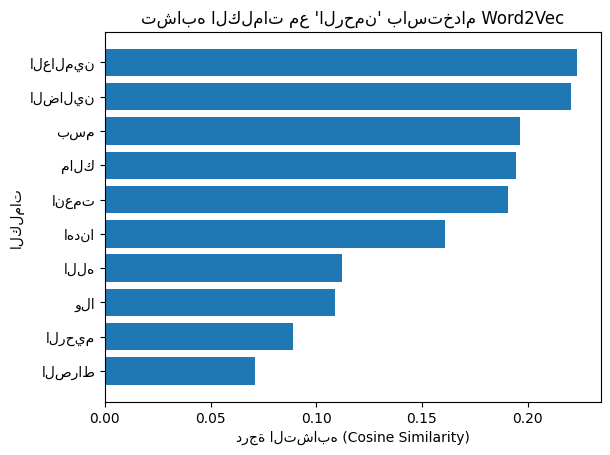

In [5]:
from gensim.models import Word2Vec
import matplotlib.pyplot as plt

# بيانات سورة الفاتحة
sentences = [
    ['بسم', 'الله', 'الرحمن', 'الرحيم'],
    ['الحمد', 'لله', 'رب', 'العالمين'],
    ['الرحمن', 'الرحيم'],
    ['مالك', 'يوم', 'الدين'],
    ['اياك', 'نعبد', 'واياك', 'نستعين'],
    ['اهدنا', 'الصراط', 'المستقيم'],
    ['صراط', 'الذين', 'انعمت', 'عليهم', 'غير', 'المغضوب', 'عليهم', 'ولا', 'الضالين']
]

# تدريب النموذج
model = Word2Vec(
    sentences,
    vector_size=50,
    window=2,
    min_count=1,
    sg=1,
    seed=42
)

# الكلمة المستهدفة
target_word = 'الرحمن'

# الكلمات المتشابهة
similar_words = model.wv.most_similar(target_word, topn=10)

# فصل الكلمات والقيم
words = [w for w, s in similar_words]
scores = [s for w, s in similar_words]

# الرسم البياني
plt.figure()
plt.barh(words, scores)
plt.xlabel("درجة التشابه (Cosine Similarity)")
plt.ylabel("الكلمات")
plt.title(f"تشابه الكلمات مع '{target_word}' باستخدام Word2Vec")
plt.gca().invert_yaxis()  # الأعلى تشابهًا في الأعلى
plt.show()
